In [2]:
# get the code
import sys
import os
import matplotlib.pyplot as plt
# use seaborn plotting defaults
import seaborn as sns; sns.set()
sys.path.append('../code')

# import package functions
from script_utils_CNV import get_CNVconfig, show_output
from plot import plot_cov, plot_snp
from script_utils_CNV import show_output
from rollingCov import rolling_coverage
from combineCNV import filter_snp

######## need to find the chained assignment!!!
pd.set_option('mode.chained_assignment', None)

# HOME
home = '/Users/mahtin'
home = '/Users/martinscience'


# standard paths
static = os.path.join(home, "Dropbox/Icke/Work/static")
tooldata = os.path.join(home, "Dropbox/Icke/Work/somVar/tooldata")
testdata = os.path.join(home,"Dropbox/Icke/Work/somVar/testdata")
PON_path = os.path.join(static, "PON/HAEv7_hg38_NovaSeq")


cnvdata = os.path.join(tooldata, "myCNVdata")
output_path = os.path.join(cnvdata, "output")
plot_path = os.path.join(cnvdata, "plot")
fig_path = os.path.join(cnvdata, "figures")

### get the config
+ use the get_CNVconfig util function to update the general configs with the appropriate paths

In [3]:
path_config = dict(
        mawk_path="../shell",
        cov_path=os.path.join(output_path, "pile2CNV"),   # path containing rawcov.gz files for this sample
        snp_path=os.path.join(output_path, "pile2CNV"),   # path containing snp files for this sample
        bed_file=os.path.join(static, "bed_files/SureSelect/hg38/SS_HAEv7_hg38_Padded.bed"),
        genome_split_path=os.path.join(static, "genome/gatk/hg38/split"),
        gc_split_path=os.path.join(static, "genome/gatk/hg38/split"),
        genmap_split_path=os.path.join(static, "annotation/genmap/hg38/split"),
        PON_path = PON_path,
    )
CNVconfig = get_CNVconfig(
    "../config/config_CNV.yaml", 
    local_config=path_config)
CNVconfig

{'pileup': {'MAPQ': 20, 'Q': 25},
 'hetSNP': {'normalVAF': [0.2, 0.8], 'minDepth': 15},
 'coverage': {'minCov': 0,
  'minPONcov': 50,
  'maxPONstd': 50,
  'GCnormalize': True},
 'PONcoverage': {'minCov': 0, 'minVAF': 0.05, 'minDepth': 50, 'stdFactor': 2},
 'filter': {'cov': {'GCrange': [0.2, 0.8], 'minPONcov': 30, 'maxPONstd': 15},
  'snp': {'maxPONVAF': 0.25, 'minPONDepth': 800}},
 'rolling': {'cov': {'normalize': False,
   'debug': True,
   'diff_exp': 4,
   'ddof': 0,
   'LLH': {'center_range': [-0.5, 0.5], 'sigma_factor': 0.9},
   'data': {'log2ratio': {'mean': 250}, 'covLLH': {'sum': 250}}},
  'snp': {'normalize': False,
   'debug': True,
   'diff_exp': 4,
   'ddof': 0,
   'LLH': {'center_range': [-0.5, 0.5], 'sigma_factor': 0.9},
   'data': {'log2ratio': {'mean': 250}, 'covLLH': {'sum': 250}}}},
 'mawk_path': '../shell',
 'cov_path': '/Users/martinscience/Dropbox/Icke/Work/somVar/tooldata/myCNVdata/output/pile2CNV',
 'snp_path': '/Users/martinscience/Dropbox/Icke/Work/somVar/tool

### load snp data and visualize

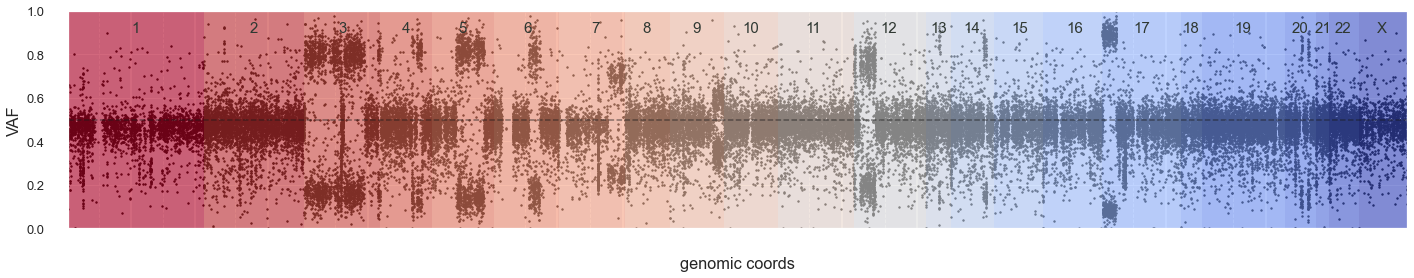

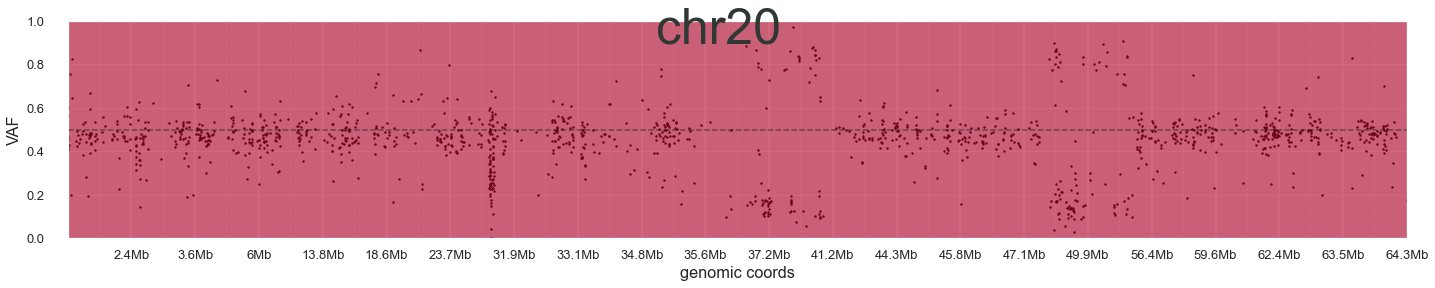

In [6]:
sample = "03_A-B"
snp_rawdf = pd.read_csv(os.path.join(output_path, f"snp/{sample}.snp.gz"), sep="\t", compression="gzip")

fig_params = dict(
    figsize=(24,4),
    colormap='coolwarm_r',
    color_chroms=True,
    ylim=(-0,1),
    label_size=13
)

vaf = dict(
        title='VAF',
        plot_type='scatter',  # ['line', 'scatter']
        data='VAF2',
        plot_args=dict(
            s=2,
            color='black',
            cmap='viridis',
            alpha=1
        )
    )
chroms = ['chr3', 'chr4', 'chr5', 'chr6','chr7', 'chr9', 'chr12', 'chr17']
r1 = 'chr17:3Mb-9Mb'



fig, _, _, _ = plot_snp(snp_rawdf, plots=[vaf], chroms="all", region='', **fig_params)
fig, _, _, _ = plot_snp(snp_rawdf, plots=[vaf], chroms="chr20", region='', **fig_params)
#fig, ax, df, chrom_df

In [ ]:
fig, _, _, _ = plot_snp(snp_rawdf.query('map75_1 > 0.5'), plots=[vaf], chroms="chr20", region='', **fig_params)

In [ ]:
fig, _, _, _ = plot_snp(snp_rawdf.query('PONVAF < .3'), plots=[vaf], chroms="chr20", region='', **fig_params)

## filter coverage data

In [ ]:
CNVconfig = get_CNVconfig(
    "../config/config_CNV.yaml", 
    local_config=path_config)

cov_df = filter_snp(cov_rawdf, config=CNVconfig)

## run the code and visualize

In [ ]:
fig.savefig(f'{plot_path}/{sample}.snp2.jpg')

### get the SNP data with FullExonPos

In [ ]:
sample = "04_A"
snp_df = pd.read_csv(os.path.join(output_path, f'tmp/{sample}.snpcov.gz'), sep='\t', compression='gzip')
snp_df

## heteroSNP rolling window
+ #### first, remove the zero SNPs to reduce data
+ #### next, fallSNP have to be removed
+ #### next, important local features have to be extracted:
    * offVAF: distance measure from the meanVAF
    * SNPdensity: measure of genomic spread of SNPs in order to find falling SNPs
    * absVAF: absolute dist measure from meanVAF
    * snpLLH: log-likelihood to belong the center gaussian
    * hsnpLLH: log-likelihood to belong to VAF==1 (to identify high purity clones)

+ #### next, these local features have to be computed with a rolling window to convert local to regional data

### remove the fallSNP
+ filter hSNPs against maxVAF
+ compute genomic snp-density (stretch / window)
+ combine with rolling offVAFsum
+ remove the negative offVAF in that range

In [ ]:
from codeCNV.rollingCNV import interpolate, one_col_rolling, llh, get_blocks, rolling_data, get_CNV_blocks
from script_utils import show_output

def make_get_density(window_size=20):
    '''
    helper for returning a density computer for given window_size
    '''
    
    def SNPdensity(data):
        return (data.max() - data.min()) / window_size
    return SNPdensity

def remove_fallSNP(snp_df, mean=0.5, std=0.2, params={}):
    '''
    removes the falling SNP probably caused by mismapping
    '''
    
    window = params['offVAFwindow']
    cutoff = params['maxFallSNP']
    
    # get the density computer for rolling
    get_SNPdensity = make_get_density(window)
    # cycle through chroms
    chrom_dfs = []
    for chrom in snp_df['Chr'].unique():
        df = snp_df.query('Chr == @chrom')
  
        # get the snp
        df = one_col_rolling(df, df.query('VAF < 0.95'), 'ExonPos', get_SNPdensity, window_size=window, diff_exp=4)
        df.loc[:, 'SNPdensity'] = df['SNPdensity'] / df['SNPdensity'].mean()
    
        # get the offVAFsum
        df = one_col_rolling(df, df.query('VAF < 0.95'), 'offVAF', 'sum', window_size=window, normalize=True, diff_exp=4)
    
        # combine both metrices
        df.loc[:, 'fallSNP'] = df['SNPdensity'] * df['offVAFsum']
        # now remove the ones below average VAFstd
        df = df.query('VAF > @mean - @std / 2 or fallSNP > @cutoff')
        chrom_dfs.append(df)
        
    return pd.concat(chrom_dfs).sort_values('FullExonPos').reset_index(drop=True)

### expand the LLH

In [ ]:
def compute_snp_llh(df, mean=0.5, sigma=0.2):
    '''
    computes the local log-likelihood of belonging to the center gaussian
    '''
        
    show_output(f"Computing log-likelihood of VAF belonging to center gaussian [mean:{round(mean, 3)}, sigma:{round(sigma,3)}]")
    df.loc[:, 'snpLLH'] = llh(df['VAF'], mean, sigma)
    
    # for homoSNPs reduce the VAFs to the ones above mean
    upper_vafs = df.query('@mean < VAF')['VAF']
    # then compute the hsnpLLH

    show_output(f"Computing log-likelihood of VAF belonging to purity100  [mean:1, sigma:{round(sigma,3)}]")
    # these are called hsnp
    # upper_vafs only contains half the snps, the remaining have to be interpolated
    df.loc[:, 'hsnpLLH'] = llh(upper_vafs, 1, sigma)
    df = interpolate(df, 'hsnpLLH', expand_limit=50)
    return df
    

def expand_SNPdata(snp_df, config):
    '''
    retrieve a few data columns locally to use rolling windows on
    this needs to be done chromosome-wise in order to avoid gap effects
    VAF limits are also applied here
    '''
        
    # split the params dict for easier access
    params = config['snp']
    filter_params = params['filter']
    # data_params = params['data']
    
    # reduce the snp_df using lower config limit
    # upper limit has to be set later as we still need the homoSNP llh
    VAFmin, VAFmax = filter_params['VAF']
    snp_df = snp_df.query('@VAFmin < VAF')
    
    
    # get std and mean of VAF
    minVAF, maxVAF = params['LLH']['center_range']
    # get the sigma and mean of the center band VAF (extracted as pd.Series center_vafs)
    center_vafs = snp_df.query('@minVAF < VAF < @maxVAF')['VAF']
    # get width of gaussian from std * sigma_factor
    VAFstd = center_vafs.std()
    VAFmean = center_vafs.mean()
    
    
    # get additional features from VAFs
    snp_df.loc[:, 'offVAF'] = (snp_df['VAF'] - VAFmean) * 2
    # absolute values for cluster 
    snp_df.loc[:,'absVAF'] = np.abs(snp_df['offVAF'])    
    
    ########## remove fallSNP ########
    fs_params = params['fallSNP']
    if fs_params['run']:
        show_output('Removing falling SNPs')
        snp_df = remove_fallSNP(snp_df, mean=VAFmean, std=VAFstd, params=fs_params)
     
    ######## LLH  #####################
    # get the snpLLH and hsnpLLH
    # get config params
    sigma = VAFstd * params['LLH']['sigma_factor']
    # hsnpLLH is computed in order to rescue high absVAF that would have been filtered out
    # lower VAF is already removed because density of VAF ~0 is highly irregular and would confound 
    snp_df = compute_snp_llh(snp_df, mean=VAFmean, sigma=sigma)

    return snp_df.query('VAF < @VAFmax').reset_index(drop=True)

In [ ]:
config = get_config(config_file, 'combine')
snp2_df = expand_SNPdata(snp_df, config)

In [ ]:
fig_params = dict(
    figsize=(20,4),
    colormap='coolwarm_r',
    color_chroms=True,
    ylim=(-0,1),
    cov_offset=.1,  # how much log2ratio=0 is shifted above SNP-data
    cov_height=.5,
    label_size=13
)


absvaf = dict(
        title='absVAF',
        plot_type='scatter',   # ['line', 'scatter']
        data='absVAF',
        plot_args=dict(
            linewidth=0.5,
            color='blue',
            s=2,
            alpha=1
        ))
deltavaf = dict(
        title='deltaVAF',
        plot_type='scatter',   # ['line', 'scatter']
        data='deltaVAF',
        plot_args=dict(
            linewidth=0.5,
            color='green',
            s=5,
            alpha=1
        ))

offvaf = dict(
        title='offVAF',
        plot_type='scatter',   # ['line', 'scatter']
        data='offVAF',
        plot_args=dict(
            linewidth=0.5,
            color='blue',
            s=5,
            alpha=1
        ))

vaf = dict(
        title='VAF',
        plot_type='scatter',  # ['line', 'scatter']
        data='VAF',
        plot_args=dict(
            s=2,
            color='black',
            cmap='viridis',
            alpha=.7
        )
    )
r1 = 'chr17:3Mb-9Mb'

fig, _, _, _  = plot_snp2(snp2_df, snp_plots=[vaf], cov_plots=[log2,log2mean], chroms=chroms, region='', **fig_params)

In [ ]:
fig.savefig(f'{plot_path}/{sample}.snp.clean.jpg')

## Rolling SNPdata

In [ ]:
def rolling_SNP(snp_df, config):
    '''
    cycle through the chroms and perform rolling window computations of snp data set in config
    '''

    # split the params dict for easier access
    params = config['snp']
    filter_params = params['filter']
    data_params = params['rolling_data']
    debug = config['debug']
        
    minDepth = filter_params['minDepth']
    filter_df = snp_df.query('Depth >= @minDepth')
    
    rolling_df = rolling_data(snp_df, filter_df, expand=params['expand'], ddof=config['ddof'], debug=debug, data_params=data_params)
    
    return rolling_df

### test rolling windows

In [ ]:
config = get_config(config_file, 'combine')
snp3_df = rolling_SNP(snp2_df, config)

## optimizing rolling windows

### VAF
+ std  (20)
+ var

In [ ]:
vaf = dict(
        title='VAF',
        plot_type='scatter',   # ['line', 'scatter']
        data='VAF',
        plot_args=dict(
            linewidth=0.5,
            color='blue',
            s=5,
            alpha=1
        ))

vafstd = dict(
        title='VAFstd',
        plot_type='line',   # ['line', 'scatter']
        data='VAFstd',
        plot_args=dict(
            linewidth=1,
            color='yellow',
            alpha=.7
        )
    )

vafstddiff = dict(
        title='VAFstdDiff',
        plot_type='line',   # ['line', 'scatter']
        data='VAFstdDiff',
        plot_args=dict(
            linewidth=1,
            color='blue',
            alpha=.7
        )
    )


config = get_config(config_file, 'combine')
snp3_df = rolling_SNP(snp2_df, config)

r1 = 'chr17:3Mb-9Mb'

std_plots = [vaf,vafstd, vafstddiff]

fig, ax, df, chrom_df = plot_snp(snp3_df, snp_plots=[vaf,vafstd], chroms=chroms, region='', **fig_params)

### absVAF
+ mean (20)
+ std

In [ ]:
absvaf = dict(
        title='absVAF',
        plot_type='scatter',   # ['line', 'scatter']
        data='absVAF',
        plot_args=dict(
            linewidth=0.5,
            color='blue',
            s=5,
            alpha=1
        ))

absvafmean = dict(
        title='absVAFmean',
        plot_type='line',   # ['line', 'scatter']
        data='absVAFmean',
        plot_args=dict(
            linewidth=1,
            color='yellow',
            alpha=.7
        )
    )

absvafmeandiff = dict(
        title='absVAFdiff',
        plot_type='line',   # ['line', 'scatter']
        data='absVAFmeanDiff',
        plot_args=dict(
            linewidth=1,
            color='blue',
            alpha=.7
        )
    )


config = get_config(config_file, 'combine')
snp3_df = rolling_SNP(snp2_df, config)


r1 = 'chr17:3Mb-9Mb'
mean_plots = [absvaf,absvafmean, absvafmeandiff]

fig, ax, df, chrom_df = plot_snp(snp3_df, snp_plots=mean_plots, chroms=chroms, region='', **fig_params)

### snpLLH

In [ ]:
snpllh = dict(
        title='snpLLH',
        plot_type='scatter',   # ['line', 'scatter']
        data='snpLLH',
        plot_args=dict(
            linewidth=0.5,
            color='blue',
            s=5,
            alpha=1
        ))

snpllhsum = dict(
        title='snpLLHsum',
        plot_type='line',   # ['line', 'scatter']
        data='snpLLHsum',
        plot_args=dict(
            linewidth=1,
            color='blue',
            alpha=.7
        )
    )

hsnpllhsum = dict(
        title='hsnpLLHsum',
        plot_type='line',   # ['line', 'scatter']
        data='hsnpLLHsum',
        plot_args=dict(
            linewidth=1,
            color='red',
            alpha=.7
        )
    )


snpllhsumdiff = dict(
        title='snpLLHsumdiff',
        plot_type='line',   # ['line', 'scatter']
        data='snpLLHsumDiff',
        plot_args=dict(
            linewidth=1,
            color='yellow',
            alpha=.7
        )
    )


config = get_config(config_file, 'combine')
snp3_df = rolling_SNP(snp2_df, config)


r1 = 'chr17:3Mb-9Mb'
snpllh_plots = [vaf,snpllhsum]

fig, ax, df, chrom_df = plot_snp(snp3_df, snp_plots=snpllh_plots, chroms=chroms, region='', **fig_params)

In [ ]:
fig, ax, df, chrom_df = plot_snp(snp3_df.query('snpLLHsum < 0.2'), snp_plots=[vaf,snpllhsum], chroms=chroms, region='chr17', **fig_params)

## bring all together
+ center snp_df
+ get extra data
+ do the rolling

In [ ]:
def apply_rolling_SNP(snp_df, config):

    # get extra data
    snp_df = expand_SNPdata(snp_df, config)
    # do the rolling
    snp_df = rolling_SNP(snp_df, config)
    # get the CNV and Center blocks
    snp_df = get_CNV_blocks(snp_df, 'snpLLH', config)
    
    # select columns for output
    base_cols = list(snp_df.columns[:4])

    snp_cols = [col for col in snp_df.columns[4:] if not 'log2' in col and not 'cov' in col and not 'off' in col]
    rolling_snp_df = snp_df[base_cols + snp_cols]
    cluster_cols = ['log2ratio', 'log2ratiomean', 'VAF', 'absVAF', 'absVAFmean']
    cluster_cols += [col for col in snp_df.columns if 'Center' in col or 'CNV' in col]
    cluster_df = snp_df[base_cols + cluster_cols]
    return rolling_snp_df, cluster_df

In [ ]:
rolling_snp_df, cluster_df = apply_rolling_SNP(snp_df, config)

## merge coverage data into SNP
+ reduce to important columns

In [ ]:
def interpolate_fullexonpon(merge_df):
    chrom_dfs = []
    for chrom in merge_df['Chr'].unique():
        chrom_df = merge_df.query('Chr == @chrom')
        chrom_df = interpolate(chrom_df, 'FullExonPos', ref_col='Pos', expand_limit=1000000)
        chrom_dfs.append(chrom_df)
    df = pd.concat(chrom_dfs).sort_values('FullExonPos')
    df.loc[:, 'FullExonPos'] = df['FullExonPos'].astype(int)
    return df


def mergeSNPnCov(cov_df, snp_df):
    
    # reduce the data to important columns
    # snp
    snp_keep_cols = list(snp_df.columns)[:3] + ['Depth', 'EBscore', 'VAF']
    snp_df = snp_df.loc[:, snp_keep_cols]
    # cov
    cov_keep_cols = list(cov_df.columns)[:4]
    for data in ['log2ratio', 'covLLH', 'covC']:
        cov_keep_cols += [col for col in cov_df.columns if data in col]
        
    cov_df = cov_df.loc[:, cov_keep_cols]
    
    # merge the data
    merge_df = cov_df.merge(snp_df, on=list(snp_df.columns[:3]), how='outer')
    
    # interpolate FullExonPos
    merge_df = interpolate_fullexonpon(merge_df)

    # interpolate the data
    for col in [col for col in merge_df.columns if 'log2ratio' in col or 'covLLH' in col or 'covC' in col]:
        merge_df = interpolate(merge_df, col, expand_limit=100)
    # reduce to VAF values
    snpcov_df = merge_df.query('VAF == VAF')
    cov_df = cov_df.query('log2ratiomean == log2ratiomean')
    return snpcov_df, cov_df

## run the code and visualize

In [ ]:
sample = "03_A-B"
snp_df = pd.read_csv(os.path.join(output_path, f"snp/{sample}.snp.gz"), sep="\t", compression="gzip")

vaf2 = dict(
        title='VAF',
        plot_type='scatter',  # ['line', 'scatter']
        data='VAF2',
        plot_args=dict(
            s=2,
            c='snpCNVcore',
            cmap='viridis',
            alpha=.7
        )
    )

absvaf = dict(
        title='absVAF',
        plot_type='scatter',   # ['line', 'scatter']
        data='absVAF2',
        plot_args=dict(
            linewidth=0.2,
            c='snpCNVcore',
            cmap='viridis',
            s=5,
            alpha=1
        ))


snpllhsum = dict(
        title='snpLLHsum',
        plot_type='line',   # ['line', 'scatter']
        data='snpLLH_sum2',
        plot_args=dict(
            linewidth=.5,
            color='red',
            alpha=.7
        )
    )

absvafmean = dict(
        title='absVAFmean',
        plot_type='line',   # ['line', 'scatter']
        data='absVAF2_mean',
        plot_args=dict(
            linewidth=1,
            color='yellow',
            alpha=.7
        )
    )

######################################################

fig_params = dict(
    figsize=(24,4),
    colormap='coolwarm_r',
    color_chroms=True,
    ylim=(-0,1),
    cov_offset=.1,  # how much log2ratio=0 is shifted above SNP-data
    cov_height=.5,
    label_size=13
)

chroms = ['chr3', 'chr4', 'chr5', 'chr6','chr7', 'chr9', 'chr12', 'chr17']
r1 = 'chr17:3Mb-9Mb'




fig, _, _, _ = plot_snp(cluster_df, snp_plots=[vaf], cov_plots=[log2,log2mean], chroms=chroms, region='', **fig_params)
#fig, ax, df, chrom_df